In [237]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib
import numba

# Case1

SPH Approximation

1 using 40 points 

In [238]:
#n is number of points and t is time 
def SPH_case1(t,n,a=1):
    delx = 2/n
    delt = 0.8*delx
    steps = int(t/delt)
    xi = np.linspace(-1+(delx/2),1-(delx/2),n)
    for i in range(steps):
        xi = xi + a*delt
        
        for j in range(len(xi)):
            if xi[j] > 1:
                xi[j] = xi[j]-2

    remain_t = t - steps*delt
    xi = xi + a*remain_t
    for j in range(len(xi)):
            if xi[j] > 1:
                xi[j] = xi[j] - 2
    res = -np.sin(np.pi*xi)
    
    plt.plot(xi,res)
    return xi, res
            
            

<function __main__.SPH_case1>

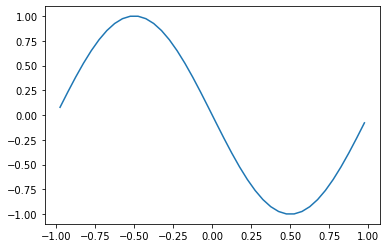

In [239]:
interact(SPH_case1, t=40, n=40)

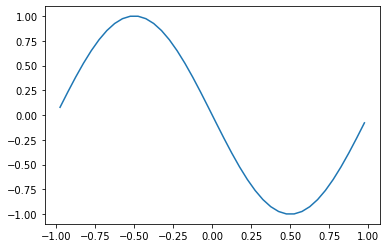

In [240]:
xi, res_using40points = SPH_case1(40,40)

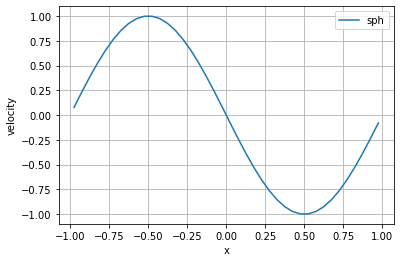

In [241]:
plt.plot(xi,res_using40points,label="sph")
plt.xlabel("x")
plt.ylabel("velocity")
plt.legend()
plt.grid()


2 Using 100 Points for discretization


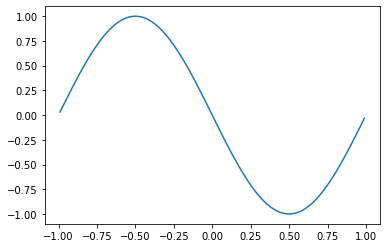

In [242]:
xi, res_using100points = SPH_case1(40,100)

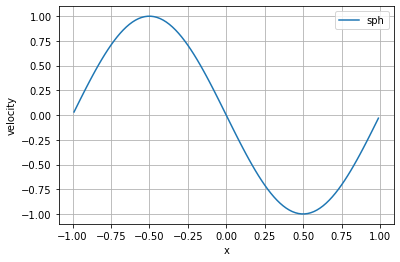

In [243]:
plt.plot(xi,res_using100points,label="sph")
plt.grid()
plt.xlabel("x")
plt.ylabel("velocity")
plt.legend()

# Case 2

SPH approximation Soln

In [244]:
def SPH_case2(n,t,a=1):
    delx = 2/n
    delt = 0.8*delx
    steps = int(t/delt)
    xi = np.linspace(-1+(delx/2),1-(delx/2),n)
    for i in range(steps):
        xi = xi + a*delt
        
        for j in range(len(xi)):
            if xi[j] > 1:
                xi[j] = xi[j]-2

    remain_t = t - steps*delt
    xi = xi + a*remain_t
    for j in range(len(xi)):
            if xi[j] > 1:
                xi[j] = xi[j] - 2
    res = np.zeros(n)
    for i in range(n):
        if abs(xi[i]) < 1/3:
            res[i] = 1
        else:
            res[i] = 0
    return xi, res
    

Using 40 points for discretization

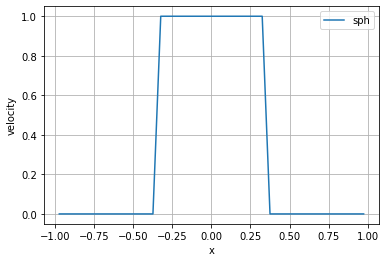

In [246]:
xi, case2_using40 = SPH_case2(40,40)
plt.plot(xi,case2_using40,label="sph")
plt.grid()
plt.xlabel("x")
plt.ylabel("velocity")
plt.legend()

Using 100 points for Discretization

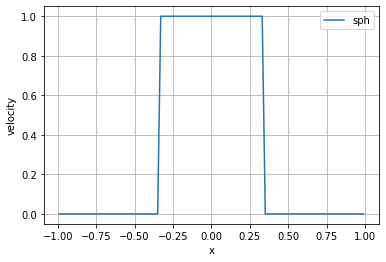

In [247]:
xi, case2_using100 = SPH_case2(100,40)
plt.plot(xi,case2_using100,label="sph")
plt.grid()
plt.xlabel("x")
plt.ylabel("velocity")
plt.legend()

# Case 3

Approach 1: Naive solution

In [248]:
def case3_update_naive(x,u,dt,h):
    n = len(x)
    dx = 2/n
    u_new = np.zeros(n)
        
    x_new = x + u*dt
    for j in range(n):
            if x_new[j] > 1:
                x_new[j] = x_new[j]-2
    for k in range(len(xi)):
        if abs(x_new[k]) < 1/3:
            u_new[k] = 1
        else:
            u_new[k] = 0
    return x_new, u_new

using 40 points for discretization

In [257]:
n=40
t=0.6
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = 0
for i in range(steps):
    xi , ui  = case3_update_naive(xi,ui,delt,h)

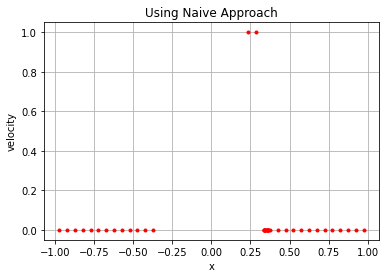

In [258]:
plt.plot(xi,ui,"r." )
plt.title("Using Naive Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

it doesnt work after some time (eg t=0.8)

In [259]:
n=40
t=0.8
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = 0
for i in range(steps):
    xi , ui  = case3_update_naive(xi,ui,delt,h)

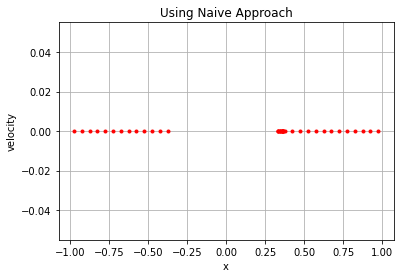

In [260]:
plt.plot(xi,ui,"r." )
plt.title("Using Naive Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

Approach 2 : Using SPH average velocity

def kernels

In [261]:
@numba.njit
def gauss(xa, xb, h):
    q = (abs(xa-xb))/h
    scale = 1.0/(h*np.sqrt(np.pi))

    if q<= 3:
        return scale*np.exp(-q**2)
    else:
        return 0

In [262]:
def case3_update_avg(x,u,dt,h):
    n = len(x)
    dx = 2/n
    u_new = np.zeros(n)
    ua = np.zeros(n)
    for i in range(n):
        avg_v=0
        for j in range(n):
            avg_v+=dx*u[j]*gauss(x[i],x[j],h)
        ua[i]=avg_v
        
    x_new = x + ua*dt
    for j in range(n):
            if x_new[j] > 1:
                x_new[j] = x_new[j]-2
    for k in range(len(xi)):
        if abs(x_new[k]) < 1/3:
            u_new[k] = 1
        else:
            u_new[k] = 0
    return x_new, u_new

Using 40 points for Discretization

In [263]:
n=40
t=0.6
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = 0
x_temp=xi
u_temp=ui
for i in range(steps):
    xi , ui  = case3_update_avg(x_temp,u_temp,delt,h)
    x_temp=xi
    u_temp=ui

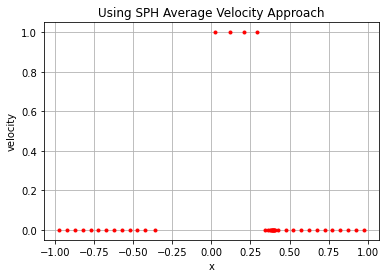

In [264]:
plt.plot(xi,ui,"r." )
plt.title("Using SPH Average Velocity Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

Using 100 points for discretization

In [265]:
n=100
t=0.6
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = 0
for i in range(steps):
    xi , ui  = case3_update_avg(xi,ui,delt,h)

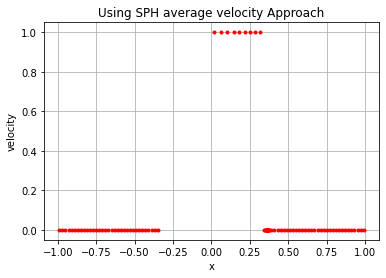

In [266]:
plt.plot(xi,ui,"r." )
plt.title("Using SPH average velocity Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

Approach3 : Using XSPH correction

In [267]:
def case3_update_XSPH(x,u,dt,h,eps):
    n = len(x)
    dx = 2/n
    u_new = np.zeros(n)
    ua = np.zeros(n)
    for i in range(n):
        avg_v=0
        for j in range(n):
            avg_v+=dx*(u[j]-u[i])*gauss(x[i],x[j],h)
        ua[i]=avg_v
    uxsph = u + eps*ua
    x_new = x + uxsph*dt
    for j in range(n):
            if x_new[j] > 1:
                x_new[j] = x_new[j]-2
    for k in range(len(xi)):
        if abs(x_new[k]) < 1/3:
            u_new[k] = 1
        else:
            u_new[k] = 0
    return x_new, u_new

using 40 points for discretization
And Using Epsilon equal to 0.5 and 1

In [268]:
n=40
t=0.6
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = 0
for i in range(steps):
    xi , ui  = case3_update_XSPH(xi,ui,delt,h,1)
    


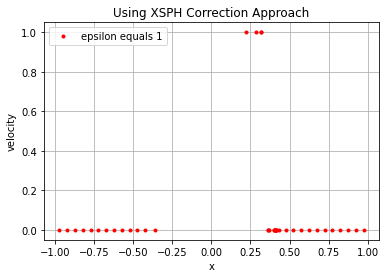

In [271]:
plt.plot(xi,ui,"r." ,label="epsilon equals 1")
plt.title("Using XSPH Correction Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()
plt.legend()

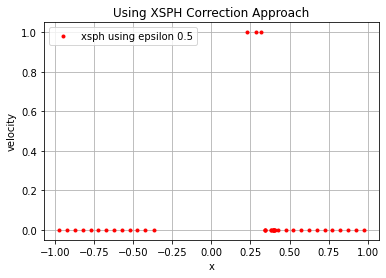

In [273]:
n=40
t=0.6
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = 0
for i in range(steps):
    xi , ui  = case3_update_XSPH(xi,ui,delt,h,0.5)
plt.plot(xi,ui,'r.',label="xsph using epsilon 0.5")
plt.legend()
plt.title("Using XSPH Correction Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

using 100 points for discretization

Text(0, 0.5, 'velocity')

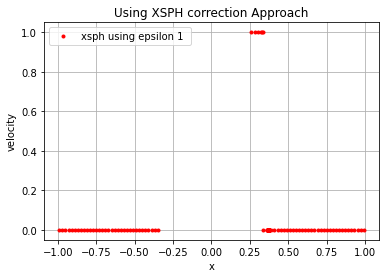

In [274]:
n=100
t=0.6
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = 0
for i in range(steps):
    xi , ui  = case3_update_XSPH(xi,ui,delt,h,1)
plt.plot(xi,ui,"r.",label="xsph using epsilon 1 ")
plt.grid()
plt.legend()
plt.title("Using XSPH correction Approach")
plt.xlabel("x")
plt.ylabel("velocity")


# Case 4

Approach 1: Naive Approach

In [275]:
def case4_update_naive(x,u,dt,h):
    n = len(x)
    dx = 2/n
    u_new = np.zeros(n)
        
    x_new = x + u*dt
    for j in range(n):
            if x_new[j] > 1:
                x_new[j] = x_new[j]-2
            if x_new[j] < -1:
                x_new[j] = x_new[j] +2
    for k in range(len(xi)):
        if abs(x_new[k]) < 1/3:
            u_new[k] = 1
        else:
            u_new[k] = -1
    return x_new, u_new

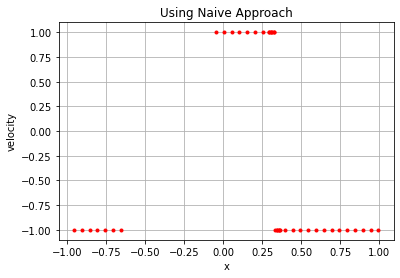

In [276]:
n=40
t=0.3
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = -1
for i in range(steps):
    xi , ui  = case4_update_naive(xi,ui,delt,h)

plt.plot(xi,ui,"r.")
plt.title("Using Naive Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

Approach 2: Using SPH average velocity

In [228]:
def case4_update_avg(x,u,dt,h):
    n = len(x)
    dx = 2/n
    u_new = np.zeros(n)
    ua = np.zeros(n)
    for i in range(n):
        avg_v=0
        for j in range(n):
            avg_v+=dx*u[j]*gauss(x[i],x[j],h)
        ua[i]=avg_v
        
    x_new = x + ua*dt
    for j in range(n):
            if x_new[j] > 1:
                x_new[j] = x_new[j]-2
            if x_new[j] < -1:
                x_new[j] = x_new[j] +2
    for k in range(len(xi)):
        if abs(x_new[k]) < 1/3:
            u_new[k] = 1
        else:
            u_new[k] = -1
    return x_new, u_new

using 40 points for discretization

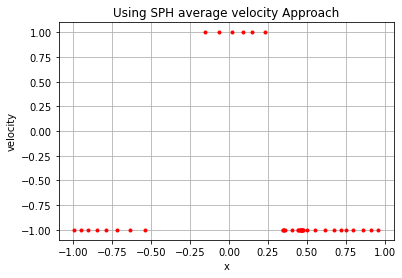

In [277]:
n=40
t=0.3
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = -1
for i in range(steps):
    xi , ui  = case4_update_avg(xi,ui,delt,h)
    
plt.plot(xi,ui,"r.")
plt.title("Using SPH average velocity Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

using 100 points for discretization

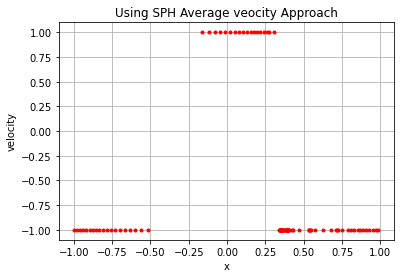

In [278]:
n=100
t=0.3
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = -1
for i in range(steps):
    xi , ui  = case4_update_avg(xi,ui,delt,h)
    
plt.plot(xi,ui,"r.")
plt.title("Using SPH Average veocity Approach")
plt.xlabel("x")
plt.ylabel("velocity")
plt.grid()

Approach 3: Using XSPH 

In [279]:
def case4_update_XSPH(x,u,dt,h,eps):
    n = len(x)
    dx = 2/n
    u_new = np.zeros(n)
    ua = np.zeros(n)
    for i in range(n):
        avg_v=0
        for j in range(n):
            avg_v+=dx*(u[j]-u[i])*gauss(x[i],x[j],h)
        ua[i]=avg_v
    uxsph = u + eps*ua
    x_new = x + uxsph*dt
    for j in range(n):
            if x_new[j] > 1:
                x_new[j] = x_new[j]-2
            if x_new[j] < -1:
                x_new[j] = x_new[j]+2
    for k in range(len(xi)):
        if abs(x_new[k]) < 1/3:
            u_new[k] = 1
        else:
            u_new[k] = -1
    return x_new, u_new

using 40 points for discretization

Text(0, 0.5, 'velocity')

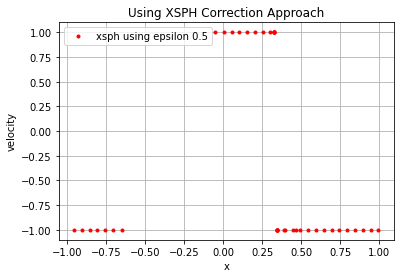

In [280]:
n=40
t=0.3
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = -1
for i in range(steps):
    xi , ui  = case4_update_XSPH(xi,ui,delt,h,0.5)

plt.plot(xi,ui,"r.",label="xsph using epsilon 0.5")
plt.grid()
plt.legend()
plt.title("Using XSPH Correction Approach")
plt.xlabel("x")
plt.ylabel("velocity")


Text(0, 0.5, 'velocity')

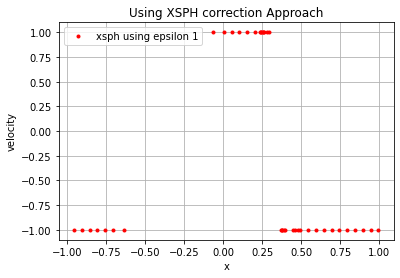

In [281]:
n=40
t=0.3
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = -1
for i in range(steps):
    xi , ui  = case4_update_XSPH(xi,ui,delt,h,1)

plt.plot(xi,ui,"r.",label="xsph using epsilon 1")
plt.grid()
plt.legend()
plt.title("Using XSPH correction Approach")
plt.xlabel("x")
plt.ylabel("velocity")


using 100 points for discretization

Text(0, 0.5, 'velocity')

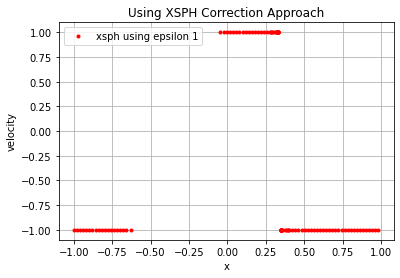

In [282]:
n=100
t=0.3
delx = 2/n
h=delx
delt = 0.8*delx
steps = int(t/delt)
xi = np.linspace(-1+(delx/2),1-(delx/2),n)
ui = np.zeros(n)
for i in range(n):
    if abs(xi[i]) < 1/3:
        ui[i] = 1
    else:
        ui[i] = -1
for i in range(steps):
    xi , ui  = case4_update_XSPH(xi,ui,delt,h,1)

plt.plot(xi,ui,"r.",label="xsph using epsilon 1")
plt.grid()
plt.legend()
plt.title("Using XSPH Correction Approach")
plt.xlabel("x")
plt.ylabel("velocity")
